In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
from helpers import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from adjustText import adjust_text

In [22]:
fpath = "/Users/neharavi/Downloads/instagram-rohit_ravi_/your_topics/your_topics.html"
yourtopics = extract_yourtopics(fpath)

In [23]:
random.sample(yourtopics, 5)

['Horticulture & Gardening',
 'Mexican Food',
 'Soups & Stews',
 'Pakistani Food',
 'Linguistics & Languages']

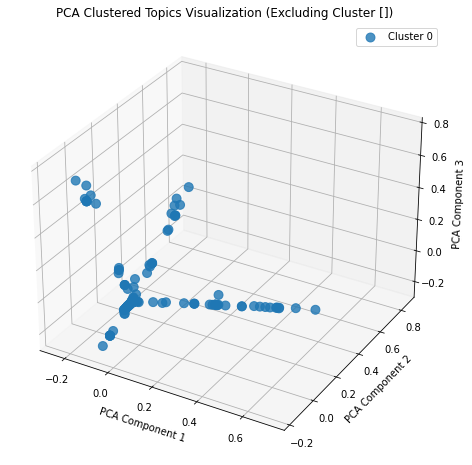

In [24]:
np.random.seed(333)

# Convert the topic list to a numpy array
topic_array = np.array(yourtopics)

# Define the number of clusters you want to create
num_clusters = 1

# Define the text vectorizer (using TF-IDF)
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english', ngram_range=(1, 2))
X = vectorizer.fit_transform(topic_array)

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Assign cluster labels to each topic
topic_clusters = kmeans.labels_

# Define clusters to exclude from the visualization
clusters_to_exclude = []

# Perform PCA to reduce dimensionality to 3D for visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X.toarray())

# Filter out data points and topic labels of the specified clusters
filtered_X_pca = X_pca[~np.isin(topic_clusters, clusters_to_exclude)]
filtered_topic_labels = topic_array[~np.isin(topic_clusters, clusters_to_exclude)]

# Create a 3D scatter plot of the clustered topics
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, label in enumerate(np.unique(topic_clusters)):
    if label in clusters_to_exclude:
        continue

    mask = topic_clusters == label
    ax.scatter(filtered_X_pca[mask, 0], filtered_X_pca[mask, 1], filtered_X_pca[mask, 2], s=80, alpha=0.8,
               label=f'Cluster {label}')
    

ax.set_title(f"PCA Clustered Topics Visualization (Excluding Cluster {clusters_to_exclude})")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.legend()

plt.show()


In [25]:
# Define the number of clusters you want to create
num_clusters = 10

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Assign cluster labels to each topic
topic_clusters = kmeans.labels_

In [26]:
print(f"{X.shape[0]} topics from the data download was converted to {X.shape[1]} tokens.")

497 topics from the data download was converted to 945 tokens.


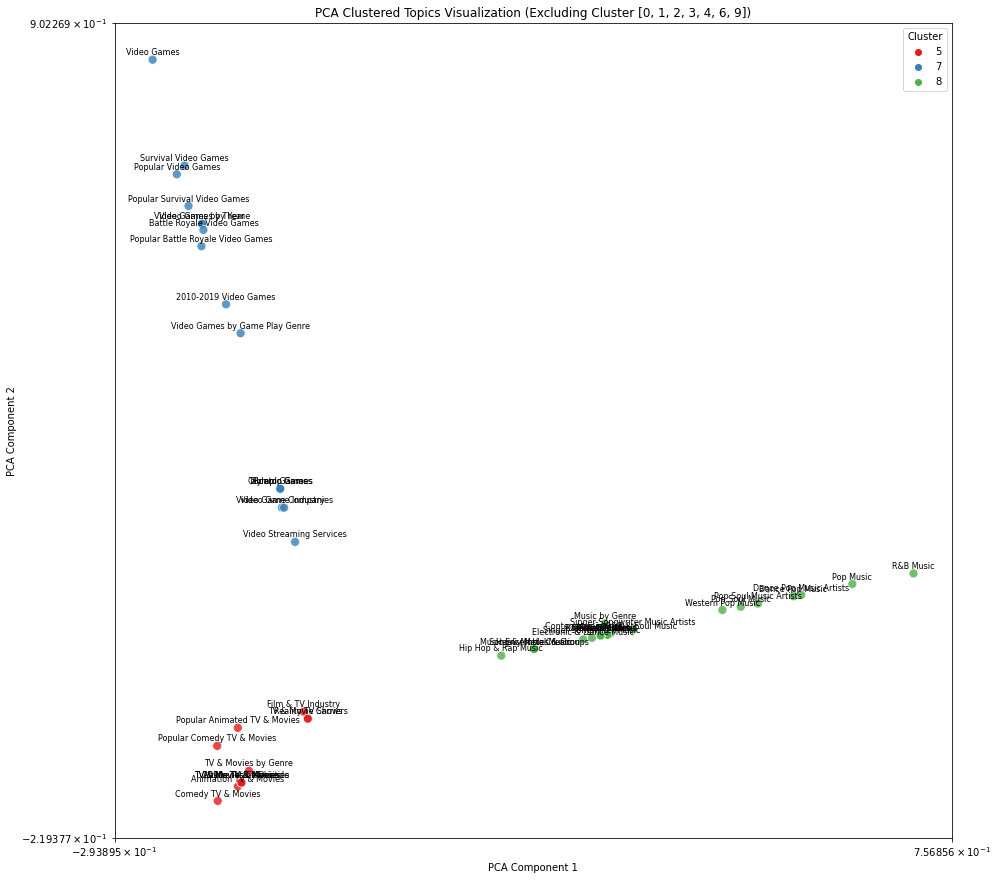

In [27]:
clusters_to_exclude = [0, 1, 2, 3, 4, 6, 9]

# Perform PCA to reduce dimensionality to 2D for visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X.toarray())

# Filter out data points and topic labels of the first cluster
filtered_X_pca = X_pca[~np.isin(topic_clusters, clusters_to_exclude)]
filtered_topic_labels = topic_array[~np.isin(topic_clusters, clusters_to_exclude)]

# Create a scatter plot of the clustered topics with log values (excluding the first cluster)
plt.figure(figsize=(15, 15))
sns.scatterplot(filtered_X_pca[:, 0], filtered_X_pca[:, 1], hue=topic_clusters[~np.isin(topic_clusters, clusters_to_exclude)],
                palette='Set1', s=80, alpha=0.8)
plt.title(f"PCA Clustered Topics Visualization (Excluding Cluster {clusters_to_exclude})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.yscale("symlog")
plt.xscale("symlog")

# Annotate each point with the topic label
for i, topic in enumerate(filtered_topic_labels):
    plt.annotate(topic, (filtered_X_pca[i, 0], filtered_X_pca[i, 1]),
                 textcoords="offset points", xytext=(0, 5),
                 ha='center', fontsize=8, color='black')
    
plt.legend(title="Cluster", loc="upper right")
plt.show()

In [28]:
# Print the topics and their corresponding clusters
for cluster_num in range(num_clusters):
    if cluster_num in clusters_to_exclude:
        continue
    cluster_topics = topic_array[topic_clusters == cluster_num]
    print(f"Cluster {cluster_num + 1}:")
    for topic in cluster_topics:
        print(topic)
    print()

Cluster 6:
2010s TV & Movies
Film & TV Industry
Comedy TV & Movies
1990s TV & Movies
Animation TV & Movies
TV & Movie Carriers
TV & Movies by Genre
Popular Animated TV & Movies
TV & Movies Celebrities
TV & Movies by Decade
Anime TV & Movies
Popular Comedy TV & Movies
Reality TV Shows

Cluster 8:
Video Games
Video Game Industry
Olympic Games
Tabletop Games
Video Games by Theme
2010-2019 Video Games
Board Games
Popular Video Games
Popular Survival Video Games
Survival Video Games
Video Games by Year
Battle Royale Video Games
Video Games by Game Play Genre
Video Game Companies
Popular Battle Royale Video Games
Video Streaming Services

Cluster 9:
Hip Hop & Rap Music
Pop Music
Singer-Songwriter Music
Electronic & Dance Music
Pop Soul Music Artists
Dance Pop Music Artists
Song & Music Creation
Heavy Metal Music
Dance Pop Music
Contemporary R&B & Soul Music
Music Roles
Emo Music
R&B Music
Music Festivals
Music by Genre
Western Pop Music
Pop Soul Music
Barbershop Music
Music Recitals
Singer-S